In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A%2BA/623/A108

In [51]:
index = 1
df = pd.read_csv(f"result/m{index}.csv")
df.head()

,Unnamed: 0,age,feh,av,dist,mass
0,0,9.439442,0.226028,0.026413,1192.238082,1.475296
1,1,9.439405,0.259196,0.043843,1144.434478,1.464205
2,2,9.324980,0.352825,0.116045,1210.922278,1.555902
3,3,9.396337,0.159923,0.025413,1297.231858,1.561334
4,4,9.436302,0.222283,0.053814,1172.756690,1.470618


In [52]:
df.shape

(250000, 6)

<AxesSubplot:xlabel='dist', ylabel='Count'>

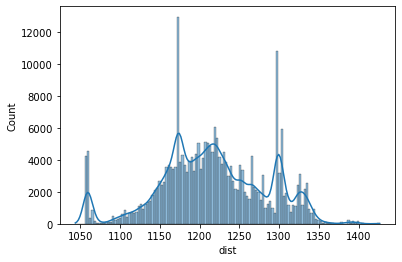

In [53]:
sns.histplot(x="dist", data=df, kde=True)

In [2]:
from scipy import stats
values = df['age']
kernel = stats.gaussian_kde(values)


NameError: name 'df' is not defined

In [20]:
df1 = pd.read_csv(f"result/1/m1.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
df2 = pd.read_csv(f"result/2/m1.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)

In [19]:
df1.head()

,age,feh,av,dist,mass
0,9.316431,-0.236155,0.225488,1382.375788,1.532977
1,9.454697,0.156956,0.035938,1279.485604,1.518713
2,9.518180,0.224113,0.046100,1108.316173,1.474038
3,9.520638,0.417587,0.026954,1143.718146,1.510718
4,9.451399,0.106784,0.053603,1160.487683,1.500881


In [21]:
df2.head()

,age,feh,av,dist,mass
0,9.439258,0.231752,0.062401,1133.566685,1.453225
1,9.271753,0.123831,0.352314,1190.077108,1.540195
2,9.302516,0.235222,0.186591,1279.976314,1.581588
3,9.338919,0.172602,0.233726,1173.853676,1.507745
4,9.417360,0.288009,0.040868,1175.781170,1.491046


In [23]:
DF = pd.concat([df1, df2])
DF.reset_index(drop=True, inplace=True)
DF

,age,feh,av,dist,mass
0,9.316431,-0.236155,0.225488,1382.375788,1.532977
1,9.454697,0.156956,0.035938,1279.485604,1.518713
2,9.518180,0.224113,0.046100,1108.316173,1.474038
3,9.520638,0.417587,0.026954,1143.718146,1.510718
4,9.451399,0.106784,0.053603,1160.487683,1.500881
...,...,...,...,...,...
499995,9.036338,0.074678,0.752165,1303.242513,1.748966
499996,9.422505,0.280240,0.030592,1176.843318,1.486519
499997,9.222781,0.220370,0.338608,1176.063935,1.573051
499998,9.150322,0.062862,0.568795,1155.718676,1.581468


<AxesSubplot:>

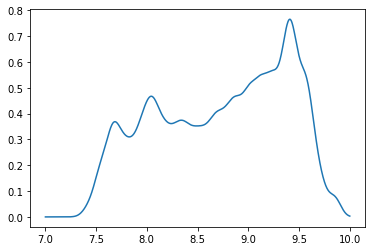

In [101]:
ages = np.linspace(7,10, 1000)
prob = kernel.pdf(ages)

sns.lineplot(x=ages, y=prob)

In [28]:
cek = []
if(len(cek) == 0):
  print("hello")

hello


In [6]:
# Age
Number = 2000
ages = np.linspace(8,10, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['age'])
  prob *= kernel.pdf(ages)
  print(i, end=" ")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,age,feh,av,dist,mass
0,9.457622,0.134074,0.297053,1265.606359,0.969573
1,9.539717,0.157271,0.374564,1362.496580,1.003789
2,9.595168,-0.372720,0.083764,1198.308781,0.823781
3,9.222852,0.022121,0.454059,1294.862926,0.989741
4,9.305552,0.116845,0.614227,1552.688885,1.101114
...,...,...,...,...,...
999995,7.646349,-0.271190,0.890052,1464.844415,1.088926
999996,9.852828,-0.025832,0.383026,1343.481509,0.917835
999997,7.624803,-0.085763,0.521138,1276.459880,1.004803
999998,8.209416,-0.024457,0.778701,1536.839931,1.133915


(9.25, 9.6)

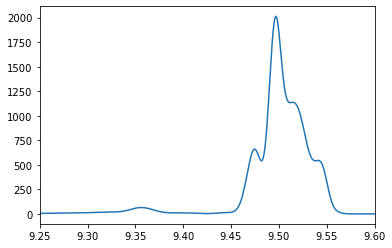

In [7]:
plt.plot(ages, prob)
plt.xlim(9.25, 9.6)

In [8]:
df_x = pd.DataFrame(dict(age=ages, prob=prob))
df_x.to_csv(f'mass/age.csv')

In [9]:
# FeH
Number = 2000
x = np.linspace(-3,1, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['feh'])
  prob *= kernel.pdf(x)
  print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

(0.0, 0.3)

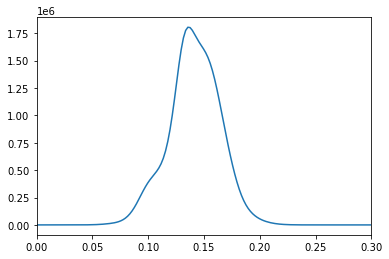

In [11]:
plt.plot(x, prob)
plt.xlim(0, 0.3)

In [12]:
df_x = pd.DataFrame(dict(feh=x, prob=prob))
df_x.to_csv(f'mass/feh.csv')

In [22]:
# AV
Number = 2000
x = np.linspace(0,1, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['av'])
  prob *= kernel.pdf(x)
  print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

(0.0, 0.3)

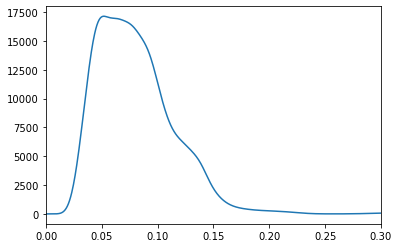

In [24]:
plt.plot(x, prob)
plt.xlim(0, 0.3)

In [25]:
df_x = pd.DataFrame(dict(feh=x, prob=prob))
df_x.to_csv(f'mass/AV.csv')

In [26]:
# Dist
Number = 2000
x = np.linspace(700,2000, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['dist'])
  prob *= kernel.pdf(x)
  print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

(1180.0, 1300.0)

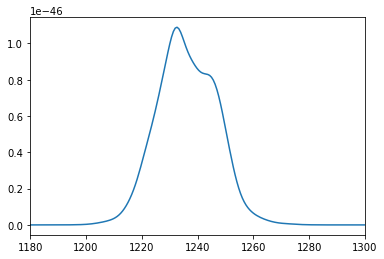

In [33]:
plt.plot(x, prob)
plt.xlim(1180, 1300)

In [34]:
df_x = pd.DataFrame(dict(dist=x, prob=prob))
df_x.to_csv(f'mass/dist.csv')

<AxesSubplot:xlabel='mass', ylabel='Count'>

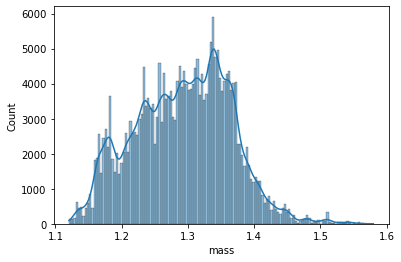

In [157]:
i = 10
df = pd.read_csv(f"result/m{i}.csv")
sns.histplot(x="mass", data=df, kde=True)

(0.0, 6.212131417201765)

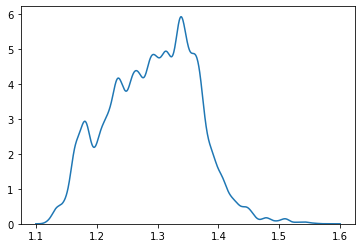

In [159]:
# mass
Number = 1000
x = np.linspace(1.1, 1.6, Number)
prob = np.ones(Number)
kernel = stats.gaussian_kde(df['mass'])
prob *= kernel.pdf(x)  
plt.plot(x, prob)
# plt.xlim(1190, 1290)
plt.ylim(0)

In [160]:
df_x = pd.DataFrame(dict(mass=x, prob=prob))
df_x.to_csv(f'mass/m{i}.csv')

(0.0, 6.121515890831442e-47)

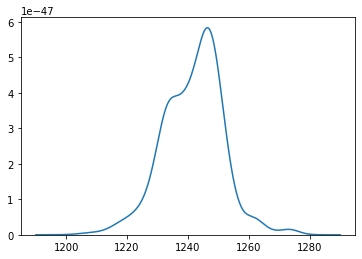

In [93]:
mask = (x > 1190)*(x<1290)
prob_x = prob[mask]
xx = x[mask]

plt.plot(xx, prob_x)
plt.ylim(0)

In [83]:
len(xx)

390

In [98]:
df_x = pd.DataFrame(dict(mass=xx, prob=prob_x))
df_x.to_csv(f'mass/m{i}.csv')

In [4]:
def mean(x, prob):
  denominator = np.sum(prob)
  nominator = np.sum(prob*x)
  return nominator/denominator

In [100]:
# Highest density interval of {perc}% of normalized distribution
def hdi(func, perc=0.68, res=1E3, min=0.0, max=1.0):
  r""" Highest density interval of {perc}% of normalized distribution
  perc: percentile
  res: resolution, number of sampling from distributiion
  min: min x-value
  max: max x-value
  """
  x = np.linspace(min, max, int(res))
  
  y = func(x)
  upper = np.max(y)*0.999
  below = 0
  
  for k in range(10):
    ys = np.linspace(upper, below, 10)
    for i in range(10):
      mask = y > ys[i]
      x_mask = x[mask]
      integral, _ = integrate.quad(func, a=x_mask[0], b=x_mask[-1])
      if(integral > perc): break
    upper = ys[i-1]
    below = ys[i]
    xMin = x_mask[0]
    xMax = x_mask[-1]
  return (xMin, xMax)

In [189]:
from scipy.signal import find_peaks
from scipy import interpolate
import scipy.integrate as integrate

df_age = pd.read_csv("mass/4/age.csv")
# df_age = pd.read_csv("age_prob.csv")
posterior = df_age.prob
x = df_age.age
posterior_normalization = integrate.simps(posterior, x)
# print(posterior_normalization)
posterior /= posterior_normalization
# print(posterior)
fun = interpolate.interp1d(x, posterior, kind="cubic")

# print(df_age.describe())
peaks, _ = find_peaks(df_age.prob, height=0)
# print(df_age.iloc[peaks])
age = df_age.age[df_age.prob == df_age.prob.max()]
age = age.values[0]
# age = df_age.iloc[peaks[2]].age
print("peak", age)
print("mean", mean(df_age.age, df_age.prob))
peaks

peak 9.545954595459548
mean 9.54290521966177


array([8324, 8601, 8645, 8724, 8864, 9008])

In [164]:
x.max()*0.999

9.540405040504051

In [193]:
hdi_perc = 0.68
hdi_below, hdi_upper = hdi(fun, perc=hdi_perc, res=1E5, min=9.1, max=9.6)
hdi_below, hdi_upper

(9.540339403394034, 9.551394513945139)

0.005615192065514307 0.005439918485590667
0.005527555275552487
9.545954595459548


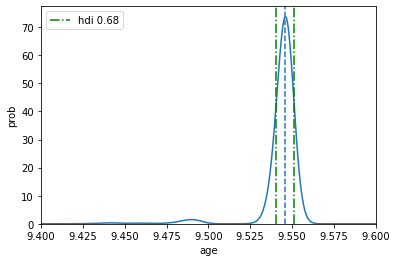

In [195]:

sns.lineplot(x="age", y="prob", data=df_age)
plt.ylim(0)
plt.xlim(9.4, 9.6)
plt.axvline(age, ls="--")
# plt.axvline(mean(x, fun(x)), ls="--", c='r', label="mean")
plt.axvline(hdi_below, ls="-.", c="g", label=f"hdi {hdi_perc}")
plt.axvline(hdi_upper, ls="-.", c="g")
plt.legend()
print(age - hdi_below, hdi_upper-age)
print((hdi_upper-hdi_below)/2)
print(age)

In [207]:
df_feh = pd.read_csv("mass/3/feh.csv")
# df_feh = pd.read_csv("feh_prob.csv")

posterior = df_feh.prob
x = df_feh.feh
posterior_normalization = integrate.simps(posterior, x)
# print(posterior_normalization)
posterior /= posterior_normalization
# print(posterior)
fun = interpolate.interp1d(x, posterior, kind="cubic")

print(df_feh.describe())
peaks, _ = find_peaks(df_feh.prob, height=0)
print(df_feh.iloc[peaks])
feh = df_feh.feh[df_feh.prob == df_feh.prob.max()]
feh = feh.values[0]
print("mode", feh)
print("mean", mean(df_feh.feh, df_feh.prob))

        Unnamed: 0           feh          prob
count  10000.00000  1.000000e+04  10000.000000
mean    4999.50000 -1.000000e+00      0.249975
std     2886.89568  1.154874e+00      1.964985
min        0.00000 -3.000000e+00      0.000000
25%     2499.75000 -2.000000e+00      0.000000
50%     4999.50000 -1.000000e+00      0.000000
75%     7499.25000  2.749943e-16      0.000000
max     9999.00000  1.000000e+00     25.323279
      Unnamed: 0       feh          prob
7434        7434 -0.026103  3.108079e-07
7885        7885  0.154315  2.532328e+01
mode 0.1543154315431545
mean 0.15090734097198102


In [208]:
hdi_perc = 0.68
hdi_below, hdi_upper = hdi(fun, perc=hdi_perc, res=1E5, min=x.min()*0.999, max=x.max()*0.999)
hdi_below, hdi_upper

(0.13325794257942603, 0.16834317343173444)

0.02105748896372847 0.014027741888579942
0.017542615426154207
0.1543154315431545


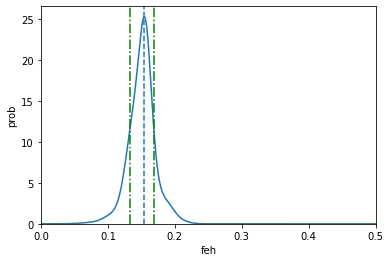

In [209]:
sns.lineplot(x="feh", y="prob", data=df_feh)
plt.ylim(0)
plt.xlim(0, 0.5)
plt.axvline(feh, ls="--")
# plt.axvline(mean(df_feh.feh, df_feh.prob), ls="--", c='r', label="mean")
# plt.legend()
plt.axvline(hdi_below, ls="-.", c="g", label=f"hdi {hdi_perc}")
plt.axvline(hdi_upper, ls="-.", c="g")
print(feh - hdi_below, hdi_upper-feh)
print((hdi_upper-hdi_below)/2)
print(feh)

In [215]:
df_av = pd.read_csv("mass/3/AV.csv", names=["index", "av", "prob"], skiprows=1)
# df_av = pd.read_csv("av_prob.csv", names=["index", "av", "prob"], skiprows=1)
posterior = df_av.prob
x = df_av.av
posterior_normalization = integrate.simps(posterior, x)
# print(posterior_normalization)
posterior /= posterior_normalization
# print(posterior)
fun = interpolate.interp1d(x, posterior, kind="cubic")

print(df_av.describe())
peaks, _ = find_peaks(df_av.prob, height=0)
print(df_av.iloc[peaks])
av = df_av.av[df_av.prob == df_av.prob.max()]
av = av.values[0]
print("mode", av)
print("mean", mean(df_av.av, df_av.prob))

             index            av           prob
count  10000.00000  10000.000000   1.000000e+04
mean    4999.50000      0.500000   9.999000e-01
std     2886.89568      0.288718   2.763082e+00
min        0.00000      0.000000   0.000000e+00
25%     2499.75000      0.250000  1.784464e-127
50%     4999.50000      0.500000   1.930162e-14
75%     7499.25000      0.750000   2.189364e-06
max     9999.00000      1.000000   1.262618e+01
      index        av          prob
848     848  0.084808  1.262618e+01
1282   1282  0.128213  6.919372e+00
4831   4831  0.483148  5.205752e-10
5129   5129  0.512951  9.870257e-10
5336   5336  0.533653  1.380008e-09
mode 0.0848084808480848
mean 0.0923349638039461


In [216]:
hdi_perc = 0.68
hdi_below, hdi_upper = hdi(fun, perc=hdi_perc, res=1E5, min=x.min()*1.001, max=x.max()*0.999)
hdi_below, hdi_upper

(0.05267779677796778, 0.1281929619296193)

0.03213068407011702 0.04338448108153449
0.03775758257582576
0.0848084808480848


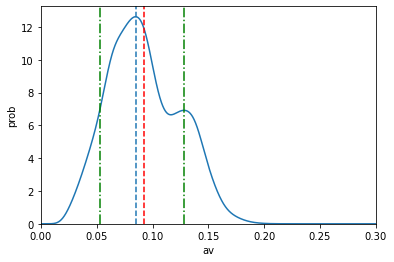

In [217]:
sns.lineplot(x="av", y="prob", data=df_av)
plt.axvline(av, ls="--")
plt.axvline(mean(df_av.av, df_av.prob), ls="--", c='r', label="mean")
# plt.legend()
plt.ylim(0)
plt.xlim(0,0.3)
plt.axvline(hdi_below, ls="-.", c="g", label=f"hdi {hdi_perc}")
plt.axvline(hdi_upper, ls="-.", c="g")
print(av- hdi_below, hdi_upper-av)
print((hdi_upper-hdi_below)/2)
print(av)

In [224]:
df_dist = pd.read_csv("mass/4/dist.csv", names=["index", "dist", "prob"], skiprows=1)
# df_dist = pd.read_csv("dist_prob.csv", names=["index", "dist", "prob"], skiprows=1)
posterior = df_dist.prob
x = df_dist.dist
posterior_normalization = integrate.simps(posterior, x)
# print(posterior_normalization)
posterior /= posterior_normalization
# print(posterior)
fun = interpolate.interp1d(x, posterior, kind="cubic")

peaks, _ = find_peaks(df_dist.prob, height=0)
print(df_dist.iloc[peaks])
dist = df_dist.dist[df_dist.prob == df_dist.prob.max()]
dist = dist.values[0]
print("mode", dist)
print("mean", mean(df_dist.dist, df_dist.prob))

      index         dist          prob
4101   4101  1233.183318  4.642776e-02
4547   4547  1291.169117  4.117036e-07
mode 1233.183318331833
mean 1232.901619453878


In [225]:
hdi_perc = 0.68
hdi_below, hdi_upper = hdi(fun, perc=hdi_perc, res=1E5, min=x.min()*1.01, max=x.max()*0.99)
hdi_below, hdi_upper

(1224.3523735237352, 1241.1179511795117)

8.830944808097911 7.934632847678586
8.382788827888248
1233.183318331833


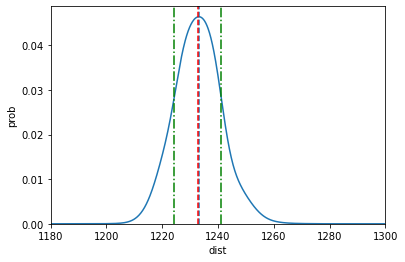

In [226]:
sns.lineplot(x="dist", y="prob", data=df_dist)
plt.axvline(dist, ls="--")
plt.axvline(mean(df_dist.dist, df_dist.prob), ls="--", c='r', label="mean")
# plt.legend()
plt.ylim(0)
plt.xlim(1180, 1300)
plt.axvline(hdi_below, ls="-.", c="g", label=f"hdi {hdi_perc}")
plt.axvline(hdi_upper, ls="-.", c="g")
print(dist- hdi_below, hdi_upper-dist)
print((hdi_upper-hdi_below)/2)
print(dist)

In [61]:
result = pd.read_csv("FSR_0866.csv")
result['b-r'] = result["b"] - result["r"]
result.head()

,index,g,g_error,r,r_error,b,b_error,parallax,parallax_error,b-r
0,0,11.278003,0.000529,10.575042,0.000652,11.874046,0.002036,0.787126,0.040036,1.299005
1,1,12.160135,0.000232,11.803123,0.000792,12.372580,0.001880,0.798561,0.037741,0.569456
2,2,12.511895,0.000231,11.850567,0.000917,13.050261,0.002017,0.840251,0.039577,1.199694
3,3,12.679243,0.000360,12.401573,0.001443,12.834153,0.001855,0.851589,0.035360,0.432580
4,4,13.133636,0.000764,12.620711,0.001752,13.481897,0.002662,0.780182,0.023758,0.861186


In [45]:
from isochrones.mist import MIST_Isochrone
from isochrones import SingleStarModel, get_ichrone

mist = get_ichrone('mist')
Mist = MIST_Isochrone()

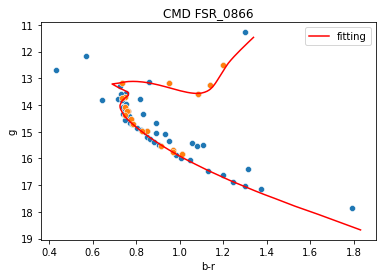

In [63]:
from numpy.random import default_rng

rng = default_rng()
numbers = [2,  11,  6,  7, 12, 13, 21, 23, 24, 27, 29, 34, 37, 38, 5, 50, 51, 53, 54, 52]
numbers.sort()
G = result['g']
B = result['b']
R = result['r']
prop = []

for i in numbers:
    props = {
        'G_mag': (result['g'][i], result['g_error'][i]),
        'RP_mag': (result['r'][i], result['r_error'][i]),
        'BP_mag': (result['b'][i], result['b_error'][i]),
        'parallax': (result['parallax'][i], result['parallax_error'][i]),
    }
    prop.append(props)
g = []
r = []
b = []
for p in prop:
    g.append(p['G_mag'][0])
    r.append(p['RP_mag'][0])
    b.append(p['BP_mag'][0])

g = np.array(g)
r = np.array(r)
b = np.array(b)

g_mod, r_mod, b_mod = np.array([]), np.array([]), np.array([])
pivot = 1.36
delta_pivot =0.08
MASSES = np.linspace(0.6, pivot, 50)
MASSES2 = np.linspace(pivot, pivot+delta_pivot, 100)
MASSES = np.concatenate((MASSES,MASSES2), axis=0)
for mass in MASSES:
    eep = mist.get_eep(mass, age, feh, accurate=True)
    pars = [eep, age, feh, dist, av]
    v = Mist.interp_mag(pars, ['G', 'RP', 'BP'])
    g_i, r_i, b_i = v[-1]
    g_mod = np.append(g_mod, g_i)
    r_mod = np.append(r_mod, r_i)
    b_mod = np.append(b_mod, b_i)
    
sns.scatterplot(x="b-r", y="g", data=result)
sns.scatterplot(x=b-r, y=g)
plt.plot(b_mod-r_mod, g_mod, label="fitting", c="r")
plt.title("CMD FSR_0866")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [262]:
df1 = pd.read_csv("mass/1/age.csv")
posterior = df1.prob
x = df1.age
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df1['pos'] = posterior
df2 = pd.read_csv("mass/2/age.csv")
posterior = df2.prob
x = df2.age
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df2['pos'] = posterior
df3 = pd.read_csv("mass/3/age.csv")
posterior = df3.prob
x = df3.age
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df3['pos'] = posterior

(0.0, 40.292475983418846)

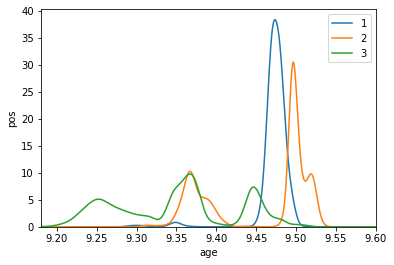

In [264]:
sns.lineplot(x="age", y="pos", data=df1, label="1")
sns.lineplot(x="age", y="pos", data=df2, label="2")
sns.lineplot(x="age", y="pos", data=df3, label="3")
plt.legend()
plt.xlim(9.18, 9.6)
plt.ylim(0)

In [256]:
df1 = pd.read_csv("mass/1/AV.csv", names=["index", "av", "prob"], skiprows=1)
posterior = df1.prob
x = df1.av
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df1['pos'] = posterior
df2 = pd.read_csv("mass/2/AV.csv", names=["index", "av", "prob"], skiprows=1)
posterior = df2.prob
x = df2.av
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df2['pos'] = posterior
df3 = pd.read_csv("mass/3/AV.csv", names=["index", "av", "prob"], skiprows=1)
posterior = df3.prob
x = df3.av
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df3['pos'] = posterior

(0.0, 36.503566905738815)

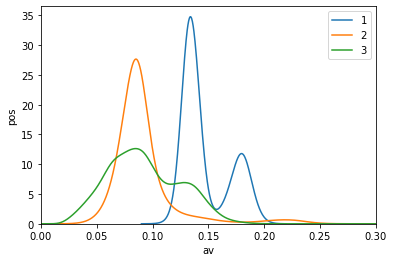

In [259]:
sns.lineplot(x="av", y="pos", data=df1, label="1")
sns.lineplot(x="av", y="pos", data=df2, label="2")
sns.lineplot(x="av", y="pos", data=df3, label="3")
plt.legend()
plt.xlim(0, 0.3)
plt.ylim(0)

In [269]:
df1 = pd.read_csv("mass/1/feh.csv", names=["index", "feh", "prob"], skiprows=1)
posterior = df1.prob
x = df1.feh
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df1['pos'] = posterior
df2 = pd.read_csv("mass/2/feh.csv", names=["index", "feh", "prob"], skiprows=1)
posterior = df2.prob
x = df2.feh
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df2['pos'] = posterior
df3 = pd.read_csv("mass/3/feh.csv", names=["index", "feh", "prob"], skiprows=1)
posterior = df3.prob
x = df3.feh
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df3['pos'] = posterior

(0.0, 35.52022842604196)

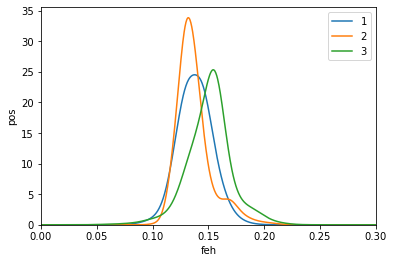

In [270]:
sns.lineplot(x="feh", y="pos", data=df1, label="1")
sns.lineplot(x="feh", y="pos", data=df2, label="2")
sns.lineplot(x="feh", y="pos", data=df3, label="3")
plt.legend()
plt.xlim(0, 0.3)
plt.ylim(0)

In [271]:
df1 = pd.read_csv("mass/1/dist.csv", names=["index", "dist", "prob"], skiprows=1)
posterior = df1.prob
x = df1.dist
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df1['pos'] = posterior
df2 = pd.read_csv("mass/2/dist.csv", names=["index", "dist", "prob"], skiprows=1)
posterior = df2.prob
x = df2.dist
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df2['pos'] = posterior
df3 = pd.read_csv("mass/3/dist.csv", names=["index", "dist", "prob"], skiprows=1)
posterior = df3.prob
x = df3.dist
posterior_normalization = integrate.simps(posterior, x)
posterior /= posterior_normalization
df3['pos'] = posterior

(0.0, 0.060230339233544906)

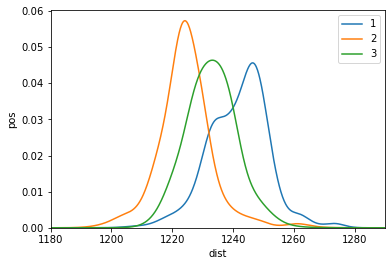

In [276]:
sns.lineplot(x="dist", y="pos", data=df1, label="1")
sns.lineplot(x="dist", y="pos", data=df2, label="2")
sns.lineplot(x="dist", y="pos", data=df3, label="3")
plt.legend()
plt.xlim(1180, 1290)
plt.ylim(0)

## Prior

In [277]:
def DistancePrior(distance):
    if isinstance(distance, np.ndarray) or isinstance(distance, list):
        return np.array(list(map(DistancePrior, distance)))
    if distance < 10_000 and distance >=0:
        return 3*np.power(distance, 2)/10_000**3
    return 0
def AgePrior(age):
    if isinstance(age, np.ndarray) or isinstance(age, list):
        return np.array(list(map(AgePrior, age)))
    if age > 5 and age < 10.5:
        return 1/(10.5-5)
    return 0
def AVPrior(AV):
    if isinstance(AV, np.ndarray) or isinstance(AV, list):
        return np.array(list(map(AVPrior, AV)))
    if AV >= 0 and AV <= 1:
        return 1
    return 0
def FehPrior(feh):
    if isinstance(feh, np.ndarray) or isinstance(feh, list):
        return np.array(list(map(FehPrior, feh)))
    halo_fraction=0.5
    disk_norm = 2.5066282746310007  # integral of the below from -np.inf to np.inf
    disk_fehdist = (
      1.0
      / disk_norm
      * (
          0.8 / 0.15 * np.exp(-0.5 * (feh - 0.016) ** 2.0 / 0.15 ** 2.0)
          + 0.2 / 0.22 * np.exp(-0.5 * (feh + 0.15) ** 2.0 / 0.22 ** 2.0)
      )
    )
    halo_mu, halo_sig = -1.5, 0.4
    halo_fehdist = (
      1.0 / np.sqrt(2 * np.pi * halo_sig ** 2) * np.exp(-0.5 * (feh - halo_mu) ** 2 / halo_sig ** 2)
    )

    return halo_fraction * halo_fehdist + (1 - halo_fraction) * disk_fehdist

(0.0, 1.0550000000000002)

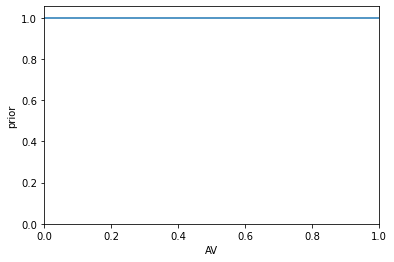

In [290]:
x = np.linspace(0, 1, 10)
y = AVPrior(x)
plt.plot(x, y)
plt.xlabel("AV")
plt.ylabel("prior")
plt.xlim(0,1)
plt.ylim(0)